# Financial Data Analysis

In [1]:
#import libs
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt

DATA="data/"

region_idx= 
{ 'US & Canada' : ['^GSPC', '^DJI', '^IXIC', '^RUT','^GSPTSE'],
  'Latin America' : ['^BVSP', '^MXX', '^IPSA'],
  'East Asia' : ['^N225', '^HSI', '000001.SS', '399001.SZ', '^TWII', '^KS11'],
  'ASEAN & Oceania' : ['^STI', '^JKSE', '^KLSE','^AXJO',  '^NZ50'],
  'South & West Asia' : ['^BSESN', '^TA125.TA'],
  'Europe' : ['^FTSE', '^GDAXI', '^FCHI', '^STOXX50E','^N100', '^BFX']
}

In [14]:
# import datasets 

# fetch data
#download and import dataset
import pandas_datareader as pdr

# s&p 500
sp500=pdr.data.DataReader('^GSPC',start='1980' ,end='2020',data_source='yahoo')
#sp500.to_csv(DATA + "sp500_dataset.csv")
sp500.name='S&P500'

# Dow Jones Insdutrial Average
dowjones=pdr.data.DataReader('^DJI',start='1980', end='2020',data_source='yahoo')
#dowjones.to_csv(DATA + "dowjones_dataset.csv")
dowjones.name='Dow Jones'
# NASDAQ composit Index
nasdaq_composit=pdr.data.DataReader('^IXIC',start='1980', end='2020',data_source='yahoo')
#nasdaq_composit.to_csv(DATA + "nasdaq_composit_dataset.csv")
nasdaq_composit.name='NASDAQ'
## Russel 2000 Index
russel2000=pdr.data.DataReader('^RUT',start='1980', end='2020',data_source='yahoo')
#russel2000.to_csv(DATA + "russel2000_dataset.csv")
russel2000.name='Russel 2000'
## VIX volatility index
vix_volatility=pdr.data.DataReader('^VIX',start='1980',end='2020',data_source='yahoo')
#vix_volatility.to_csv(DATA + "vix_volatility_dataset.csv") 
vix_volatility.name="VIX Volatility"
## FTSE 100 
dax_index=pdr.data.DataReader('^GDAXI',start='1980',end='2020',data_source='yahoo')
#dax_index.to_csv(DATA + "dax_performance_dataset.csv") 
dax_index.name='DAX Index'
#Shenzhen Component Index
shenzhen_component=pdr.data.DataReader('399001.SZ',start='1980',end='2020',data_source='yahoo')
#shenzhen_component.to_csv(DATA + "shenzhen_component_dataset.csv")   
shenzhen_component.name='Shenzhen Component Index'
# nikkei 22
nikkei225=pdr.data.DataReader('^N225',start='1980',end='2020',data_source='yahoo')
#nikkei225.to_csv(DATA + "nikkei225_dataset.csv") 
nikkei225.name='Nikkei 225'
#Hang Seng  Index
hangseng=pdr.data.DataReader('^HSI',start='1980',end='2020',data_source='yahoo')
hangseng.to_csv(DATA + "hangseng_dataset.csv") 
hangseng.name='Hang Seng Index'
#crude oil
crude_oil = pdr.data.DataReader('CL=F',start='1980',end='2020',data_source='yahoo')
#crude_oil.to_csv(DATA + "crude_oil_dataset.csv")
crude_oil.name='Crude Oil'
#silver
silver = pdr.data.DataReader('SI=F',start='1980',end='2020',data_source='yahoo')
silver.to_csv(DATA + "silver_dataset.csv")
silver.name="Silver"
#usd-chinese yuan
usdcny = pdr.data.DataReader('USDCNY=X',start='1980',end='2020',data_source='yahoo')
usdcny.to_csv(DATA + "usdcny_dataset.csv")
usdcny.name='USD-CNY'
#usd-euro
usdeur = pdr.data.DataReader('EUR=X',start='1980',end='2020',data_source='yahoo')
usdeur.to_csv(DATA + "usdeur_dataset.csv")
usdeur.name='USD-EUR'

#usd-jpy
usdjpy = pdr.data.DataReader('USDJPY=X',start='1980',end='2020',data_source='yahoo')
usdjpy.to_csv(DATA + "usdjpy_dataset.csv")
usdjpy.name='USD-JPY'
## Target data

#dollar_index
dollar_index=pdr.data.DataReader ('DX=F',start='1980', end='2020',data_source='yahoo')
#dollar_index.to_csv(DATA+ "dollar_index_dataset.csv")
dollar_index.name='Dollar Index'
# comex gold ounce
gold=pdr.data.DataReader('GC=F',start='1980', end='2020',data_source='yahoo')
#gold.to_csv(DATA + "gold_dataset.csv")
gold.name='Gold'

usdhkd=pdr.data.DataReader ('HKD=X',start='1980', end='2020',data_source='yahoo')
usdhkd.to_csv(DATA+ "usdhkd_dataset.csv")
usdhkd.name='USD-HKD'

In [15]:

datasets=[sp500,dowjones,nasdaq_composit,russel2000,
vix_volatility,dax_index,shenzhen_component,nikkei225,hangseng,crude_oil,
silver,usdcny,usdeur,usdjpy,usdhkd,dollar_index,gold]

In [51]:
# create a dataset

fin_dataset=pd.DataFrame({})
#fin_dataset=pd.DataFrame(sp500)
#fin_dataset.rename(columns={"Close":sp500.name},inplace=True)
for index in datasets:
    fin_dataset=pd.merge(fin_dataset,index["Close"],how="outer",left_index=True,right_index=True)
    fin_dataset.rename(columns={"Close":index.name},inplace=True)    


In [52]:
fin_dataset

,S&P500,Dow Jones,NASDAQ,Russel 2000,VIX Volatility,DAX Index,Shenzhen Component Index,Nikkei 225,Hang Seng Index,Crude Oil,Silver,USD-CNY,USD-EUR,USD-JPY,USD-HKD,Dollar Index,Gold
Date,,,,,,,,,,,,,,,,,
1980-01-02,105.760002,NaN,148.169998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,105.220001,NaN,145.970001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,106.519997,NaN,148.020004,NaN,NaN,NaN,NaN,6560.160156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,106.809998,NaN,148.619995,NaN,NaN,NaN,NaN,6552.649902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-08,108.949997,NaN,150.679993,NaN,NaN,NaN,NaN,6563.279785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,3240.020020,28645.259766,9006.620117,1669.030029,13.43,13337.110352,10233.769531,23837.720703,28225.419922,61.720001,17.849001,6.9963,0.900810,109.542000,7.78790,96.545998,1513.800049
2019-12-30,3221.290039,28462.140625,8945.990234,1664.150024,14.82,13249.009766,10365.959961,23656.619141,28319.390625,61.680000,17.908001,6.9948,0.894270,109.428001,7.78733,96.406998,1514.500000
2019-12-31,3230.780029,28538.439453,8972.599609,1668.469971,13.78,NaN,10430.769531,NaN,28189.750000,61.060001,17.827999,6.9857,0.892674,108.873001,7.78810,96.057999,1519.500000


## Convert currency to Dolar base

In [53]:
# jpy -> usd
fin_dataset["Nikkei 225"]=fin_dataset["Nikkei 225"]/fin_dataset["USD-JPY"]
# cny -> usd
fin_dataset["Shenzhen Component Index"]=fin_dataset["Shenzhen Component Index"]/fin_dataset["USD-CNY"]
# hkd -> usd
fin_dataset["Hang Seng Index"]=fin_dataset["Hang Seng Index"]/fin_dataset["USD-HKD"]
# eur -> usd
fin_dataset["DAX Index"]=fin_dataset["DAX Index"]/fin_dataset["USD-EUR"]



In [54]:
fin_dataset

,S&P500,Dow Jones,NASDAQ,Russel 2000,VIX Volatility,DAX Index,Shenzhen Component Index,Nikkei 225,Hang Seng Index,Crude Oil,Silver,USD-CNY,USD-EUR,USD-JPY,USD-HKD,Dollar Index,Gold
Date,,,,,,,,,,,,,,,,,
1980-01-02,105.760002,NaN,148.169998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,105.220001,NaN,145.970001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,106.519997,NaN,148.020004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,106.809998,NaN,148.619995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-08,108.949997,NaN,150.679993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,3240.020020,28645.259766,9006.620117,1669.030029,13.43,14805.686330,1462.740192,217.612612,3624.265852,61.720001,17.849001,6.9963,0.900810,109.542000,7.78790,96.545998,1513.800049
2019-12-30,3221.290039,28462.140625,8945.990234,1664.150024,14.82,14815.446927,1481.952283,216.184330,3636.598176,61.680000,17.908001,6.9948,0.894270,109.428001,7.78733,96.406998,1514.500000
2019-12-31,3230.780029,28538.439453,8972.599609,1668.469971,13.78,NaN,1493.160218,NaN,3619.592821,61.060001,17.827999,6.9857,0.892674,108.873001,7.78810,96.057999,1519.500000


In [55]:
fin_dataset.to_csv("outs/financial_dataframe.csv")

In [58]:
present_data=fin_dataset.dropna()

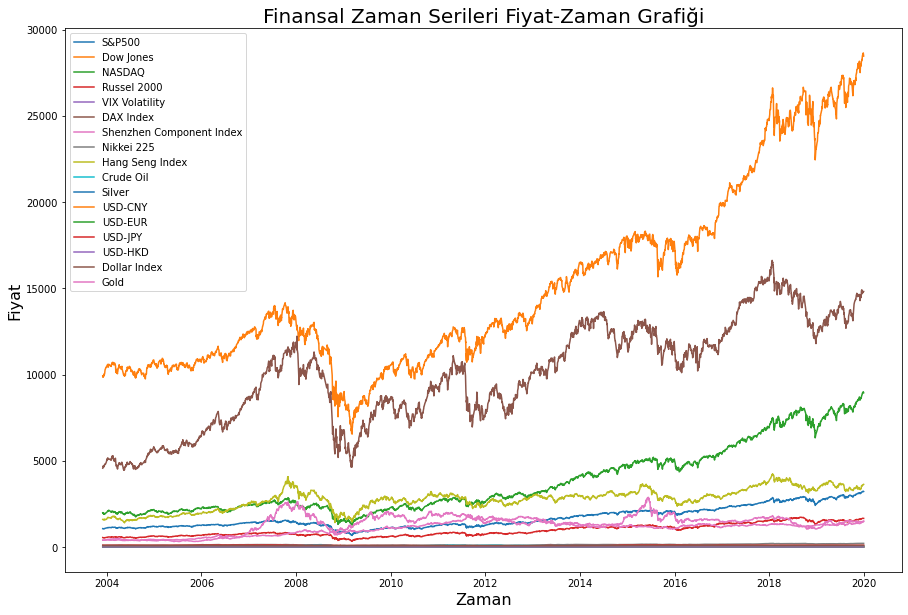

In [64]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 10))
for index in datasets:
    plt.plot(present_data.index, present_data[index.name],label=index.name)
plt.xlabel("Zaman", fontsize=16)
plt.ylabel("Fiyat",fontsize=16)
plt.title("Finansal Zaman Serileri Fiyat-Zaman Grafiği",fontsize=20)
plt.legend()
#plt.show()
plt.savefig("assets/all_charts_nonmissing.png")

In [65]:
present_data.to_csv(DATA+"/present_data.csv")